## Boston Dataset
We are going to look at a Boston housing dataset in this example

## Imports

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.typing as npt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(y_test: npt.NDArray, y_pred: npt.NDArray) -> np.float64:
  '''Calculates the root mean square between an array of known and predicated values'''
  return np.sqrt(mean_squared_error(y_test,y_pred))


In [ ]:
help(rmse)

## Read in Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
url = "http://ddc-datascience.s3-website-us-west-1.amazonaws.com/boston.csv"
!curl -s {url} | head | cut -c1-100

,per_cap_crime,res_zoning_prop,business_prop,river_front,nitric_oxide_conc,num_rooms,units_before_19
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5


In [6]:
boston = pd.read_csv( url, index_col = 0)
boston.head()

,per_cap_crime,res_zoning_prop,business_prop,river_front,nitric_oxide_conc,num_rooms,units_before_1940,distance_to_employment,distance_to_hwy,prop_tax,pupil_teacher_ratio,perc_lower_status,med_home_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston.shape

(490, 13)

## Data Cleaning

In [8]:
boston.describe( include = "all" ).transpose()

,count,mean,std,min,25%,50%,75%,max
per_cap_crime,490.0,3.643241,8.722154,0.00632,0.082045,0.24751,3.647423,88.9762
res_zoning_prop,490.0,11.112245,22.844626,0.00000,0.000000,0.00000,12.500000,100.0000
business_prop,490.0,11.113143,6.821302,0.74000,5.190000,9.69000,18.100000,27.7400
river_front,490.0,0.059184,0.236209,0.00000,0.000000,0.00000,0.000000,1.0000
nitric_oxide_conc,490.0,0.554307,0.116688,0.38500,0.449000,0.53800,0.624000,0.8710
num_rooms,490.0,6.245471,0.653147,3.56100,5.881000,6.18500,6.578000,8.7800
units_before_1940,490.0,68.278980,28.164790,2.90000,44.550000,76.80000,93.875000,100.0000
distance_to_employment,490.0,3.834519,2.109948,1.13700,2.111050,3.27590,5.214600,12.1265
distance_to_hwy,490.0,9.514286,8.691297,1.00000,4.000000,5.00000,24.000000,24.0000
prop_tax,490.0,408.002041,168.065190,187.00000,280.250000,330.00000,666.000000,711.0000


In [9]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   per_cap_crime           490 non-null    float64
 1   res_zoning_prop         490 non-null    float64
 2   business_prop           490 non-null    float64
 3   river_front             490 non-null    float64
 4   nitric_oxide_conc       490 non-null    float64
 5   num_rooms               490 non-null    float64
 6   units_before_1940       490 non-null    float64
 7   distance_to_employment  490 non-null    float64
 8   distance_to_hwy         490 non-null    float64
 9   prop_tax                490 non-null    float64
 10  pupil_teacher_ratio     490 non-null    float64
 11  perc_lower_status       490 non-null    float64
 12  med_home_value          490 non-null    float64
dtypes: float64(13)
memory usage: 53.6 KB


## EDA

Text(0, 0.5, 'Count')

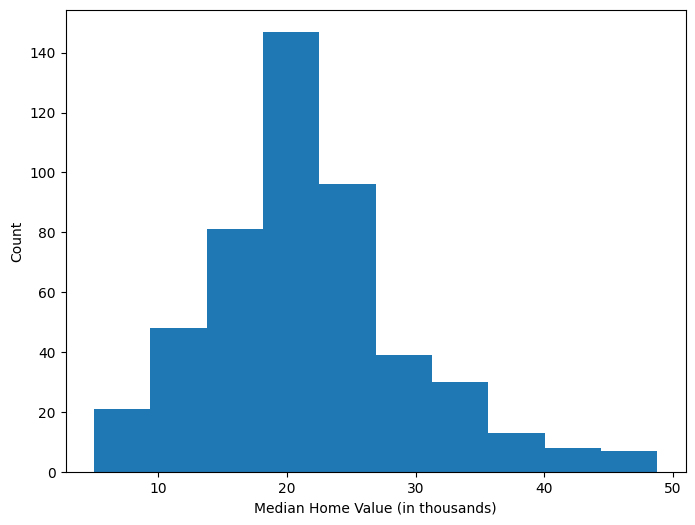

In [10]:
plt.figure(figsize = (8,6))
plt.hist(boston['med_home_value'])
plt.xlabel('Median Home Value (in thousands)')
plt.ylabel('Count')

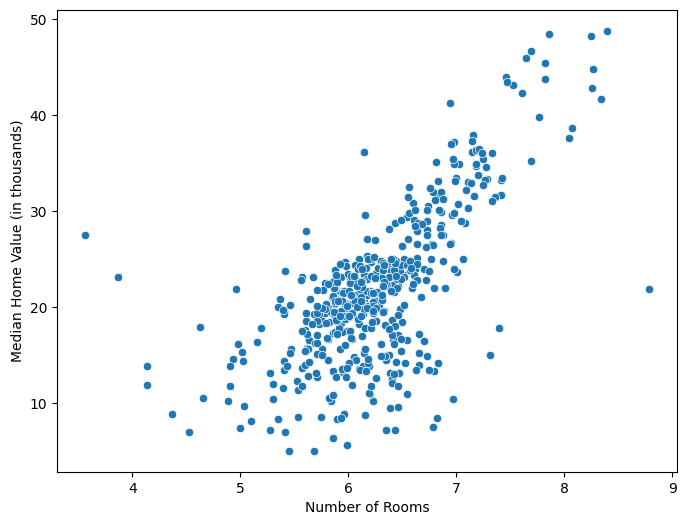

In [11]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = boston['num_rooms'], y = boston['med_home_value'])
plt.xlabel('Number of Rooms')
plt.ylabel("Median Home Value (in thousands)") ;

## Linear Regression
We will first fit a multiple linear regression model using all of the predictors.

In [12]:
# First we will break up our data into training and testing sets
X = boston.drop('med_home_value', axis = 1).copy()
X = sm.add_constant(X)
y = boston['med_home_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [13]:
train_test_split?

In [14]:
# Fit a linear model using Statsmodels
myfit = sm.OLS(y_train, X_train).fit()
myfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         med_home_value   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     105.3
Date:                Thu, 08 Feb 2024   Prob (F-statistic):          1.30e-112
Time:                        22:50:18   Log-Likelihood:                -1080.9
No. Observations:                 392   AIC:                             2188.
Df Residuals:                     379   BIC:                             2239.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.6016      4.496      8.363      0.000      28.762      46.442
per_cap_crime             -0.1201      0.027     -4.375      0.000      -0.174      -0.066
res_zoning_prop            0.0328      0.013      2.528      0.012       0.007       0.058
business_prop             -0.0856      0.058     -1.464      0.144      -0.201       0.029
river_front                0.3469      0.937      0.370      0.711      -1.495       2.188
nitric_oxide_conc        -13.1057      3.448     -3.801      0.000     -19.885      -6.326
num_rooms                  3.6449      0.401      9.091      0.000       2.857       4.433
units_before_1940         -0.0358      0.012     -2.916      0.004      -0.060      -0.012
distance_to_employment    -1.3085      0.183     -7.150      0.000      -1.668      -0.949
distance_to_hwy            0.2661      0.061      4.341      0.000       0.146       0.387
prop_tax                  -0.0143      0.004     -4.017      0.000      -0.021      -0.007
pupil_teacher_ratio       -0.8331      0.125     -6.671      0.000      -1.079      -0.588
perc_lower_status         -0.3230      0.048     -6.780      0.000      -0.417      -0.229
==============================================================================
Omnibus:                       51.344   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.401
Skew:                           0.824   Prob(JB):                     3.48e-18
Kurtosis:                       4.485   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Perform cross validation
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = sm.OLS(y_train, X_train).fit()
  y_pred = model.predict(X_test)
  results[idx] = rmse(y_test,y_pred)

print(f"CV RMSE: {results.mean().round(2)*1000}")

CV RMSE: 3880.0


Text(0, 0.5, 'Predicted Values')

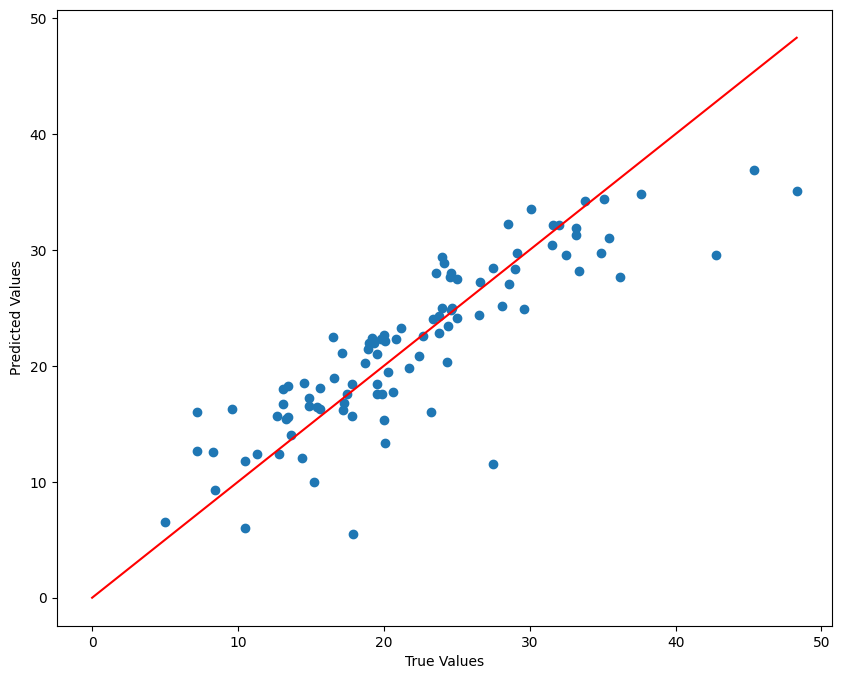

In [16]:
# Generate figure of predicted vs actual results
plt.figure(figsize=(10,8));
plt.scatter(y_test, y_pred);
p1 = max(y_pred.max(), y_test.max())
plt.plot([0, p1],[0, p1], c='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

## Transformation of Response

Box Cox is a commonly used transformation that is used to transform a non-normal distribution to a normal distribution. Recall that one of the assumptions of linear regression is that the residuals are normally distributed. If that assumption is not being met, we can transform the response using a Box Cox transformation to try to make them more normally distributed.

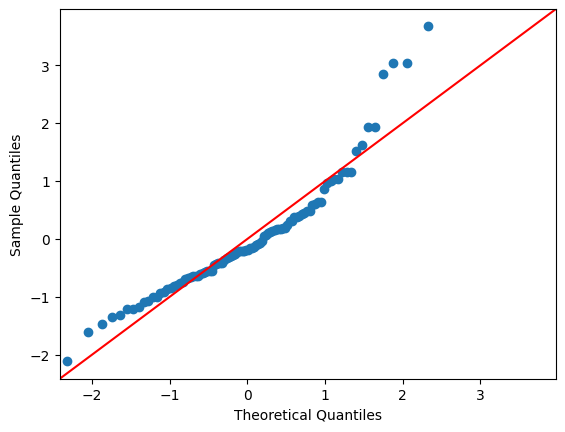

In [17]:
# QQ Plot - Residuals of Linear Model Above
import scipy.stats as stats
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45")
plt.show()

### Box Cox Implementation

In [18]:
from scipy import stats
from scipy import special
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 4)
fitted_data, fitted_lambda = stats.boxcox(y_train)
print(fitted_lambda)


0.40240798359540325


In [19]:
y_train.mean() , y_train.median()

(21.734438775510206, 21.1)

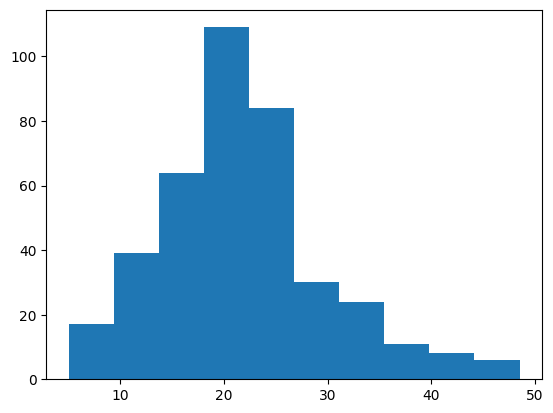

In [20]:
plt.hist(y_train) ;

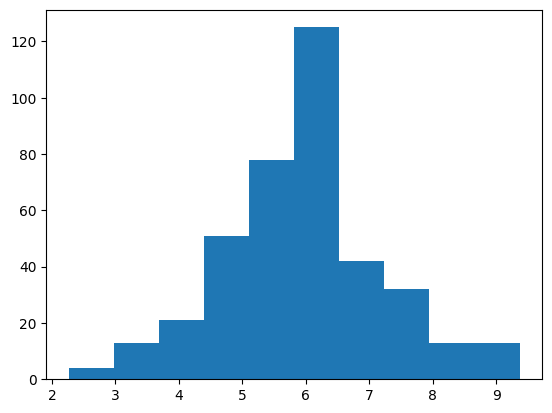

In [21]:
plt.hist(fitted_data) ;

In [22]:
# Perform CV
# FIXME insert
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  fitted_data, fitted_lambda = stats.boxcox(y_train) # Perform the box cox transformation on y_train
  model = sm.OLS(fitted_data, X_train).fit() # Fit the linear regression model. Note: you can also perform box cox with Lasso or Ridge regression
  y_pred = model.predict(X_test)
  real_y_pred = special.inv_boxcox(y_pred, fitted_lambda) # Perform the inverse box cox to get predictions back on original scale
  results[idx] = rmse(y_test,real_y_pred)
print(f"CV RMSE: {results.mean().round(2)*1000}")

CV RMSE: 3640.0


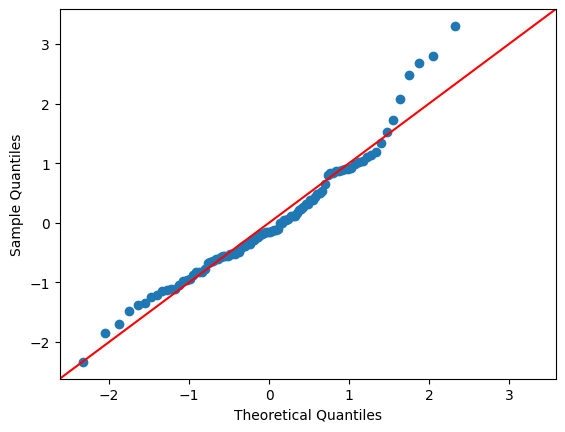

In [23]:
# QQ Plot
import scipy.stats as stats
res = y_test - real_y_pred
sm.qqplot(res, fit=True, line="45")
plt.show()